## Clustering w/Anomaly Detection
#### Corey Solitaire
`11-08-2020`

In [1]:
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
#Call in Foram df
species = pd.read_csv("tripati2011.csv")
df1 = species.copy()
df1.columns = (['depth', 'species', 'b_ca_ratio', 'mg_ca_ratio'])
df1.head()

,depth,species,b_ca_ratio,mg_ca_ratio
0,0.09,G. ruber,119.1,4.4
1,0.09,G. sacculifer,70.5,4.1
2,0.40,G. ruber,119.8,3.7
3,0.40,G. ruber,114.7,3.8
4,0.40,G. sacculifer,77.2,3.4


*** 

## Clustering Order of Operations (STEPS):

`Step #1: Select the Variables You Want to Cluster`   
`Step #2: Convert to array & dtype float`   
`Step #3: Scale to standard normal`   
`Step #4: Create DBSCAN object and fit`   
`Step #5: Extract labels`   
`Step #6: Add labels back to original dataframe`   
`Step #7: Explore`      

***

### Step #1: Select the Variables You Want to Cluster

In [3]:
df1.drop(["species"], axis = 1, inplace = True)
df1.head()

,depth,b_ca_ratio,mg_ca_ratio
0,0.09,119.1,4.4
1,0.09,70.5,4.1
2,0.40,119.8,3.7
3,0.40,114.7,3.8
4,0.40,77.2,3.4


### Step #2: Convert to array & dtype float   

In [4]:
np_array = df1.values.astype("float32", copy = False)
np_array[0:10]

array([[9.000e-02, 1.191e+02, 4.400e+00],
       [9.000e-02, 7.050e+01, 4.100e+00],
       [4.000e-01, 1.198e+02, 3.700e+00],
       [4.000e-01, 1.147e+02, 3.800e+00],
       [4.000e-01, 7.720e+01, 3.400e+00],
       [8.000e-01, 1.144e+02, 3.500e+00],
       [8.000e-01, 7.660e+01, 3.300e+00],
       [9.500e-01, 1.195e+02, 3.600e+00],
       [9.500e-01, 7.450e+01, 3.500e+00],
       [1.200e+00, 1.145e+02, 3.700e+00]], dtype=float32)

### Step #3: Scale to standard normal   

In [5]:
scaler = MinMaxScaler().fit(np_array)
np_array = scaler.transform(np_array)
np_array[0:10]

array([[0.        , 0.7867747 , 0.8125001 ],
       [0.        , 0.1309042 , 0.6250001 ],
       [0.00094607, 0.79622144, 0.37500012],
       [0.00094607, 0.7273955 , 0.43750012],
       [0.00094607, 0.22132248, 0.18750012],
       [0.00216681, 0.7233469 , 0.25000012],
       [0.00216681, 0.21322542, 0.12500012],
       [0.00262459, 0.79217285, 0.31250012],
       [0.00262459, 0.18488532, 0.25000012],
       [0.00338755, 0.72469646, 0.37500012]], dtype=float32)

### Step #4: Create DBSCAN object and fit   

In [6]:
dbsc = DBSCAN(eps = .10, min_samples = 20).fit(np_array)

In [7]:
# Now, let's add the scaled value columns back onto the dataframe
columns = list(df1.columns)
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df1.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df1.merge(scaled_df, on=df1.index)
df = df.drop(columns=['key_0'])

### Step #5: Extract labels   

In [8]:
labels = dbsc.labels_
labels[0:10]

array([-1, -1, -1, -1,  1, -1, -1, -1,  1, -1])

### Step #6: Add labels back to original dataframe 

In [9]:
df['labels'] = labels
df.labels.value_counts()

-1    149
 0    148
 2     30
 1     28
Name: labels, dtype: int64

In [10]:
df[df.labels==-1].head()

,depth,b_ca_ratio,mg_ca_ratio,Scaled_depth,Scaled_b_ca_ratio,Scaled_mg_ca_ratio,labels
0,0.09,119.1,4.4,0.000000,0.786775,0.8125,-1
1,0.09,70.5,4.1,0.000000,0.130904,0.6250,-1
2,0.40,119.8,3.7,0.000946,0.796221,0.3750,-1
3,0.40,114.7,3.8,0.000946,0.727395,0.4375,-1
5,0.80,114.4,3.5,0.002167,0.723347,0.2500,-1


### Step #7: Explore 

In [11]:
# Let's look at the descriptive stats for the entire population, the inliers, then the outliers/anomalies
print("Population")
print(df.describe())
print("-------------")
print("Inliers")
print(df[df.labels==0].describe())
print("-------------")
print("Outliers")
print(df[df.labels==-1].describe())

Population
            depth  b_ca_ratio  mg_ca_ratio  Scaled_depth  Scaled_b_ca_ratio  \
count  355.000000  355.000000   355.000000    355.000000         355.000000   
mean    53.678254   93.583380     3.779437      0.163543           0.442421   
std     54.636246   17.053733     0.309090      0.166742           0.230145   
min      0.090000   60.800000     3.100000      0.000000           0.000000   
25%     17.745000   76.050000     3.550000      0.053880           0.205803   
50%     37.080000   99.000000     3.800000      0.112888           0.515520   
75%     76.340000  107.050000     4.000000      0.232704           0.624157   
max    327.760000  134.900000     4.700000      1.000000           1.000000   

       Scaled_mg_ca_ratio      labels  
count          355.000000  355.000000  
mean             0.424648   -0.171831  
std              0.193181    0.899652  
min              0.000000   -1.000000  
25%              0.281250   -1.000000  
50%              0.437500    0.000000

In [12]:
df.columns

Index(['depth', 'b_ca_ratio', 'mg_ca_ratio', 'Scaled_depth',
       'Scaled_b_ca_ratio', 'Scaled_mg_ca_ratio', 'labels'],
      dtype='object')

### Visualize:

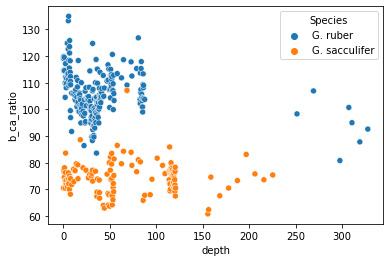

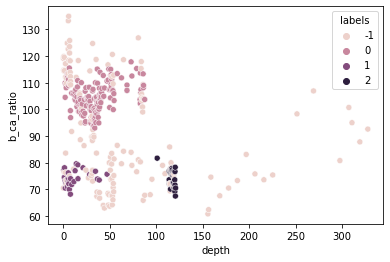

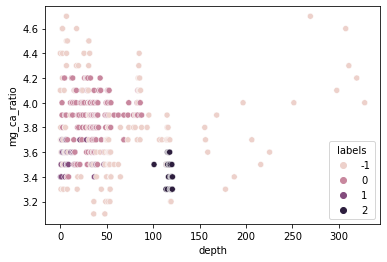

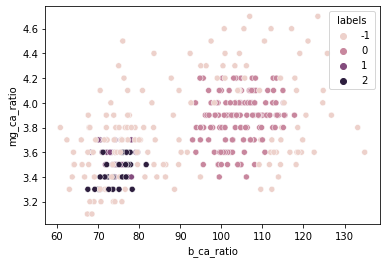

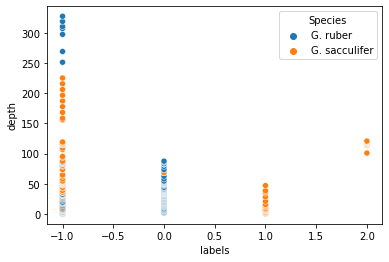

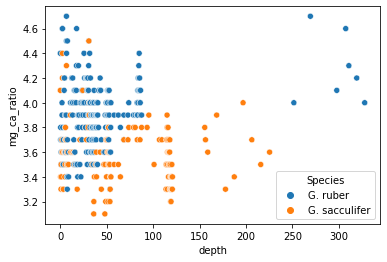

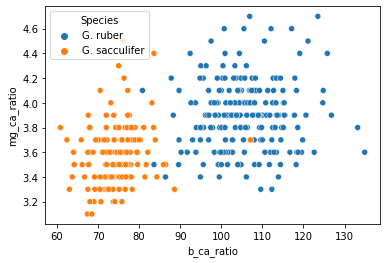

In [13]:
sns.scatterplot(df.depth, df.b_ca_ratio, hue=species.Species)
plt.show()

sns.scatterplot(df.depth, df.b_ca_ratio, hue=df.labels)
plt.show()

sns.scatterplot(df.depth, df.mg_ca_ratio, hue=df.labels)
plt.show()

sns.scatterplot(df.b_ca_ratio, df.mg_ca_ratio, hue=df.labels)
plt.show()

sns.scatterplot(df.labels, df.depth, hue=species.Species)
plt.show()

sns.scatterplot(df.depth, df.mg_ca_ratio, hue=species.Species)
plt.show()

sns.scatterplot(df.b_ca_ratio, df.mg_ca_ratio, hue=species.Species)
plt.show()



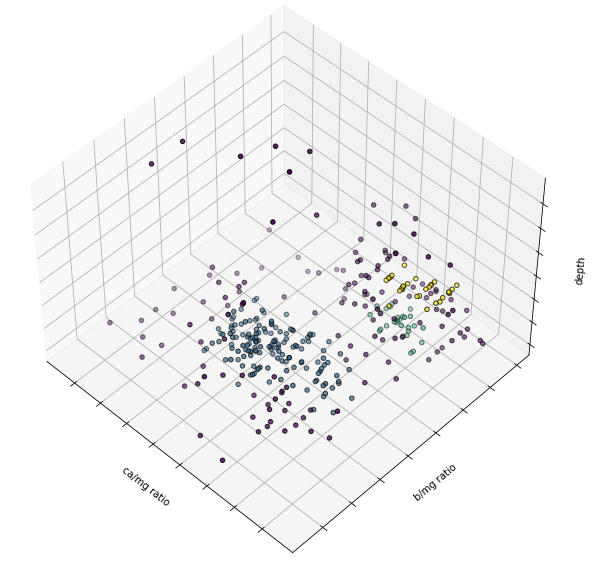

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.mg_ca_ratio, df.b_ca_ratio, df.depth, c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('ca/mg ratio')
ax.set_ylabel('b/mg ratio')
ax.set_zlabel('depth')
plt.show()

## Classroom Exercises

#### Experiment with the DBSCAN properties


- Read up on the epsilon and min_samples arguments into DBSCAN at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
    
- Experiment with altering the epsilon values (the eps argument holding the threshhold parameter). Run the models and visualize the results. What has changed? Why do you think that is?

- Double the min_samples parameter. Run your model and visualize the results. Consider what changed and why.


#### Epsilon represents the distance between two samples used to cluster them.  Greater epsilon values should result in fewer groups, fewer epsilon values should restult in more groups.  

### Epsilon Increased to 1

In [15]:
# Change eps to 1 (default is .1)
dbsc = DBSCAN(eps = 1, min_samples = 20).fit(np_array)

# Now, let's add the scaled value columns back onto the dataframe
columns = list(df1.columns)
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df1.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df1.merge(scaled_df, on=df1.index)
df = df.drop(columns=['key_0'])

#extract labels
labels = dbsc.labels_

#add them back to df
df['labels'] = labels

#### Visualize

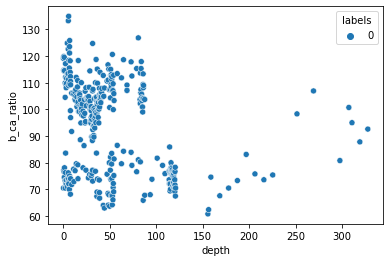

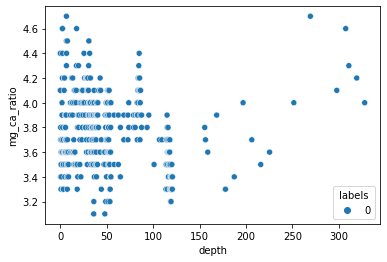

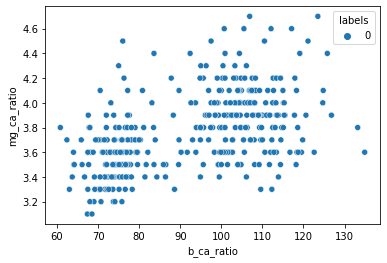

In [16]:
sns.scatterplot(df.depth, df.b_ca_ratio, hue=df.labels)
plt.show()

sns.scatterplot(df.depth, df.mg_ca_ratio, hue=df.labels)
plt.show()

sns.scatterplot(df.b_ca_ratio, df.mg_ca_ratio, hue=df.labels)
plt.show()

#### Takeaway:

`Only one large group is created`

### Epsilon decreased to .01

In [17]:
# Change eps to .01 (default is .1)
dbsc = DBSCAN(eps = .01, min_samples = 20).fit(np_array)

# Now, let's add the scaled value columns back onto the dataframe
columns = list(df1.columns)
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df1.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df1.merge(scaled_df, on=df1.index)
df = df.drop(columns=['key_0'])

#extract labels
labels = dbsc.labels_

#add them back to df
df['labels'] = labels

### Visualize

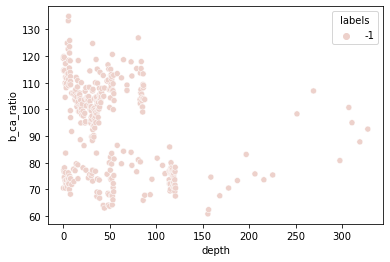

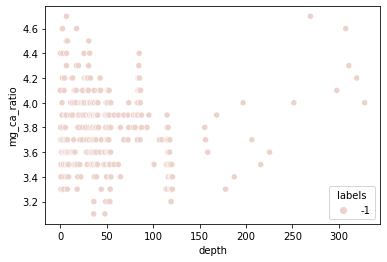

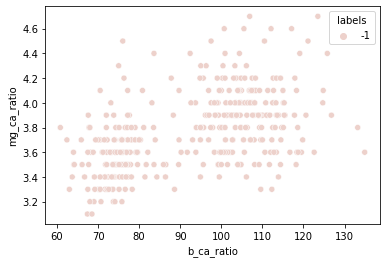

In [18]:
sns.scatterplot(df.depth, df.b_ca_ratio, hue=df.labels)
plt.show()

sns.scatterplot(df.depth, df.mg_ca_ratio, hue=df.labels)
plt.show()

sns.scatterplot(df.b_ca_ratio, df.mg_ca_ratio, hue=df.labels)
plt.show()

### Takeaway

`One large group at -1`

## Double the min_samples parameter

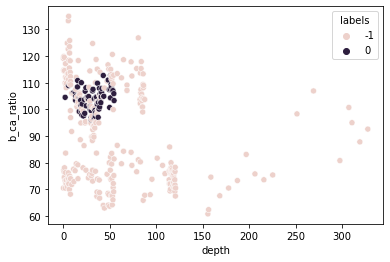

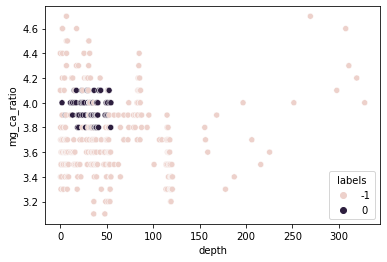

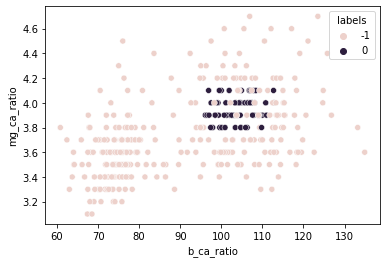

In [19]:
# Change min_samples to 40 (default is 20)
dbsc = DBSCAN(eps = .1, min_samples = 40).fit(np_array)

# Now, let's add the scaled value columns back onto the dataframe
columns = list(df1.columns)
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df1.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df1.merge(scaled_df, on=df1.index)
df = df.drop(columns=['key_0'])

#extract labels
labels = dbsc.labels_

#add them back to df
df['labels'] = labels

#Visualize
sns.scatterplot(df.depth, df.b_ca_ratio, hue=df.labels)
plt.show()

sns.scatterplot(df.depth, df.mg_ca_ratio, hue=df.labels)
plt.show()

sns.scatterplot(df.b_ca_ratio, df.mg_ca_ratio, hue=df.labels)
plt.show()

## Reduce the min_samples parameter by half

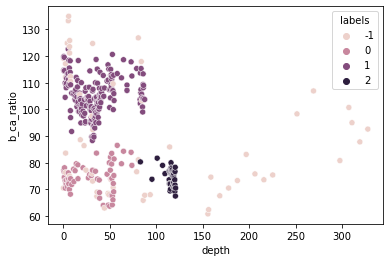

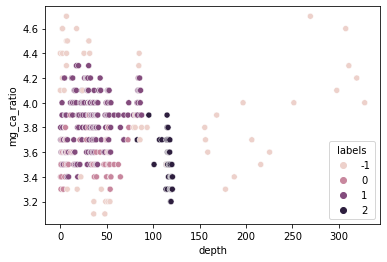

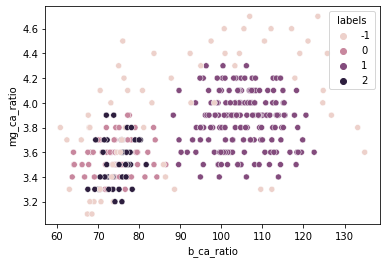

In [20]:
# Change min_samples to 40 (default is 20)
dbsc = DBSCAN(eps = .1, min_samples = 10).fit(np_array)

# Now, let's add the scaled value columns back onto the dataframe
columns = list(df1.columns)
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df1.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df1.merge(scaled_df, on=df1.index)
df = df.drop(columns=['key_0'])

#extract labels
labels = dbsc.labels_

#add them back to df
df['labels'] = labels

#Visualize
sns.scatterplot(df.depth, df.b_ca_ratio, hue=df.labels)
plt.show()

sns.scatterplot(df.depth, df.mg_ca_ratio, hue=df.labels)
plt.show()

sns.scatterplot(df.b_ca_ratio, df.mg_ca_ratio, hue=df.labels)
plt.show()